In [1]:
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
from re import search
import time
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

# Focusing on the web-scraping portion of the work

In [3]:
url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?ref_=bo_cso_ac'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

## Initially, we will focus on getting the elements from the table on the original url

In [4]:
table = soup.find('table')
rows = [row for row in table.find_all('tr')]

In [37]:
rows[1]

<tr><td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank">1</td><td class="a-text-left mojo-field-type-title"><a class="a-link-normal" href="/title/tt2488496/?ref_=bo_cso_table_1">Star Wars: Episode VII - The Force Awakens</a></td><td class="a-text-right mojo-field-type-money">$936,662,225</td><td class="a-text-left mojo-field-type-year"><a class="a-link-normal" href="/year/2015/?ref_=bo_cso_table_1">2015</a></td></tr>

In [28]:
#After having each of the rows of the table, we could get the name and the link for more info on the movie

In [79]:
rows[1].find_all('td')[1].find('a').text

'Star Wars: Episode VII - The Force Awakens'

In [26]:
rows[1].find_all('td')[1].find('a')['href']

'/title/tt2488496/?ref_=bo_cso_table_1'

In [31]:
#Now, we will focus on getting the titles and the links for each movie and will storage those 
#values on a list call title_link. This will hold the first 200 values. 

In [167]:
title_link = []

In [169]:
for row in rows[1:201]:
    link = row.find_all('td')[1].find('a')['href']
    title_link.append(link)

In [171]:
len(title_link)

200

In [173]:
title_link[0]

'/title/tt2488496/?ref_=bo_cso_table_1'

In [88]:
#Now, let's focus on getting the information for one specific movie, we will begin with 
#Star Wars. To do this, we will create a function, that eventually will help us
#gather the information for all of the movies of the first page.

In [363]:
movie_data = []

In [2]:
def get_info(link):
    base_u = 'https://www.boxofficemojo.com/'
    url = base_u + link
    response = requests.get(url)
    #This is to be sure that we had a positive response
    if response.ok:
        page = response.text
        soup = BeautifulSoup(page, "lxml")
    else:
        pass #Here I should find a way to go to the next iteration of the loop
    summary = soup.find(class_= 'a-section a-spacing-none mojo-performance-summary-table')
    try:
        do_gross = int(summary.find_all('span', class_= 'money')[0].text.replace('$','').replace(',',''))
    except:
        do_gross = None
    try:
        intr = int(summary.find_all('span', class_= 'money')[1].text.replace('$','').replace(',',''))
    except:
        intr = None
    try:
        worldw = int(summary.find_all('span', class_= 'money')[2].text.replace('$','').replace(',',''))
    except:
        worldw = None
    try:
        title = soup.find('h1', class_='a-size-extra-large').contents[0]
    except:
        title = None
        
    #Now, getting the elements from another summary table.
    try: 
        dist = soup.find(text=re.compile('Distributor')).findNext().contents[0]
    except:
        dist = None
    try: 
        budget = int(soup.find(text=re.compile('Budget')).findNext().contents[0].text.replace('$','').replace(',',''))
    except:
        budget = None
    try:
        dom_op = int(soup.find(text=re.compile('Opening')).findNext().contents[0].text.replace('$','').replace(',',''))
    except:
        dom_op = None
    try:
        rating = soup.find(text=re.compile('MP')).findNext().text
    except:
        rating = None
    try:
        runt = soup.find(text=re.compile('Running')).findNext().text
        try:
            runt = runt.split()
            minutes = int(runt[0])*60 + int(runt[2])
        except:
            minutes = None
    except:
        runt = None
    try:
        genre = soup.find(text=re.compile('Genres')).findNext().text.replace('\n','').strip()
    except:
        genre = None
    try:
        rdate = soup.find(text=re.compile('Release Date')).findNext().text.split('\n')[0]
    except:
        rdate = None
    time.sleep(0.5)
    """"
    print(f'For {title}, the domestic gross was {do_gross} and the worldwide was {worldw}')
    print(f'and the budget for the movie was {budget}, distribuited by {dist}')
    print(f'It made {dom_op} on the opening weekend, it lasts {minutes} and it is {rating} rated')
    print(f'and the genre is {genre}')
    print(f'and the released date is: {rdate}')
    """
    
    headers = ['Title', 'Domestic opening', 'Domestic total gross','Worldwide Gross', 'Budget',
           'Runtime', 'Rating', 'Release date','Distributor', 'Genre']
    movie_dict = dict(zip(headers, 
                                [title,
                                dom_op,
                                do_gross,
                                worldw,
                                budget,
                                minutes,
                                rating, 
                                rdate,
                                dist,
                                genre
                                ]))

    movie_data3.append(movie_dict)
    return movie_data3

In [ ]:
get_info('/title/tt2488496/?ref_=bo_cso_table_1')

In [368]:
#Now, let's get the info for the first 200. 

In [376]:
for link in title_link[1:201]:
    get_info(link)

In [389]:
len(movie_data)

200

In [391]:
movie_data[0]

{'Title': 'Star Wars: Episode VII - The Force Awakens',
 'Domestic opening': 247966675,
 'Domestic total gross': 936662225,
 'Worldwide Gross': 2069521700,
 'Budget': 245000000,
 'Runtime': 138,
 'Rating': 'PG-13',
 'Release date': 'December 16, 2015',
 'Distributor': 'Walt Disney Studios Motion Pictures',
 'Genre': 'Action            Adventure            Sci-Fi'}

In [392]:
movie_data[-1]

{'Title': 'Dawn of the Planet of the Apes',
 'Domestic opening': 72611427,
 'Domestic total gross': 208545589,
 'Worldwide Gross': 710644566,
 'Budget': 170000000,
 'Runtime': 130,
 'Rating': 'PG-13',
 'Release date': 'July 9, 2014',
 'Distributor': 'Twentieth Century Fox',
 'Genre': 'Action            Adventure            Drama            Sci-Fi'}

In [390]:
#Ok, great, we have the info for the first 200 movies

# Ok, it works for the first page of links, now, I'm going to grab the links for the 800 movies left. 

In [394]:
links_for_movies_table = ['https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200',\
                          'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=400',\
                          'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=600',\
                          'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=800']

In [355]:
#These are the 4 links from where we will get the rest of the links for the other 800 movies. 

In [ ]:
movies_links = []

In [358]:
for link in links_for_movies_table:
    response = requests.get(link)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    table = soup.find('table')
    rows = [row for row in table.find_all('tr')]
    for row in rows[1:201]:
        link_ = row.find_all('td')[1].find('a')['href']
        movies_links.append(link_)
    time.sleep(2)

In [395]:
len(movies_links)

800

In [360]:
movies_links[0]

'/title/tt0372784/?ref_=bo_cso_table_1'

In [397]:
#Let's try to add 200 movies more. 
for link in movies_links[1:201]:
    get_info(link)

In [398]:
#let's see the results!

In [404]:
len(movie_data)

400

In [407]:
#Alrigth, it's working so far, now, I'll pickle out the list just in case something goes wrong 

In [410]:
pickle_out = open("list.pickle","wb")
pickle.dump(movie_data, pickle_out)
pickle_out.close()

RecursionError: maximum recursion depth exceeded while pickling an object

In [411]:
import sys
sys.setrecursionlimit(10000)

In [412]:
pickle_out = open("dict.pickle","wb")
pickle.dump(movie_data, pickle_out)
pickle_out.close()

In [420]:
pickle_in = open("dict.pickle","rb")
retrieved_list = pickle.load(pickle_in)

In [421]:
len(retrieved_list)

400

In [423]:
#Alright, I'll add the 600 that are left more!

In [424]:
for link in movies_links[202:]:
    get_info(link)

In [425]:
#Lettttt's see

In [426]:
len(movie_data)

998

In [428]:
movie_data[:5]

[{'Title': 'Star Wars: Episode VII - The Force Awakens',
  'Domestic opening': 247966675,
  'Domestic total gross': 936662225,
  'Worldwide Gross': 2069521700,
  'Budget': 245000000,
  'Runtime': 138,
  'Rating': 'PG-13',
  'Release date': 'December 16, 2015',
  'Distributor': 'Walt Disney Studios Motion Pictures',
  'Genre': 'Action            Adventure            Sci-Fi'},
 {'Title': 'Avengers: Endgame',
  'Domestic opening': 357115007,
  'Domestic total gross': 858373000,
  'Worldwide Gross': 2797501328,
  'Budget': 356000000,
  'Runtime': 181,
  'Rating': 'PG-13',
  'Release date': 'April 24, 2019',
  'Distributor': 'Walt Disney Studios Motion Pictures',
  'Genre': 'Action            Adventure            Drama            Sci-Fi'},
 {'Title': 'Avatar',
  'Domestic opening': 77025481,
  'Domestic total gross': 760507625,
  'Worldwide Gross': 2847246203,
  'Budget': 237000000,
  'Runtime': 162,
  'Rating': 'PG-13',
  'Release date': 'December 16, 2009',
  'Distributor': 'Twentieth Cen

In [429]:
movie_data[-5:]

[{'Title': 'Saw III',
  'Domestic opening': 33610391,
  'Domestic total gross': 80238724,
  'Worldwide Gross': 164874275,
  'Budget': 10000000,
  'Runtime': 108,
  'Rating': 'R',
  'Release date': 'October 27, 2006',
  'Distributor': 'Lionsgate',
  'Genre': 'Crime            Horror            Mystery            Thriller'},
 {'Title': 'The Mummy',
  'Domestic opening': 31688375,
  'Domestic total gross': 80227895,
  'Worldwide Gross': 409231607,
  'Budget': 125000000,
  'Runtime': 111,
  'Rating': 'PG-13',
  'Release date': 'June 6, 2017',
  'Distributor': 'Universal Pictures',
  'Genre': 'Action            Adventure            Fantasy            Horror            Thriller'},
 {'Title': 'Disturbia',
  'Domestic opening': 22224982,
  'Domestic total gross': 80209692,
  'Worldwide Gross': 118114220,
  'Budget': 20000000,
  'Runtime': 105,
  'Rating': 'PG-13',
  'Release date': 'April 12, 2007',
  'Distributor': 'DreamWorks',
  'Genre': 'Crime            Drama            Mystery           

In [430]:
#It worked! Now, creating the dataframe!

moviesdf = pd.DataFrame(movie_data)  #convert list of dict to df
moviesdf.set_index('Title', inplace=True)

moviesdf.info

In [432]:
moviesdf.head()

Domestic opening  \
Title                                                         
Star Wars: Episode VII - The Force Awakens        247966675   
Avengers: Endgame                                 357115007   
Avatar                                             77025481   
Black Panther                                     202003951   
Avengers: Infinity War                            257698183   

                                            Domestic total gross  \
Title                                                              
Star Wars: Episode VII - The Force Awakens             936662225   
Avengers: Endgame                                      858373000   
Avatar                                                 760507625   
Black Panther                                          700426566   
Avengers: Infinity War                                 678815482   

                                            Worldwide Gross     Budget  \
Title                                                                    
Star Wars: Episode VII - The Force Awakens     2.069522e+09  245000000   
Avengers: Endgame                              2.797501e+09  356000000   
Avatar                                         2.847246e+09  237000000   
Black Panther                                  1.347598e+09        NaN   
Avengers: Infinity War                         2.048360e+09        NaN   

                                            Runtime Rating       Release date  \
Title                                                                           
Star Wars: Episode VII - The Force Awakens    138.0  PG-13  December 16, 2015   
Avengers: Endgame                             181.0  PG-13     April 24, 2019   
Avatar                                        162.0  PG-13  December 16, 2009   
Black Panther                                 134.0  PG-13  February 13, 2018   
Avengers: Infinity War                        149.0  PG-13     April 25, 2018   

                                                                    Distributor  \
Title                                                                             
Star Wars: Episode VII - The Force Awakens  Walt Disney Studios Motion Pictures   
Avengers: Endgame                           Walt Disney Studios Motion Pictures   
Avatar                                                    Twentieth Century Fox   
Black Panther                               Walt Disney Studios Motion Pictures   
Avengers: Infinity War                      Walt Disney Studios Motion Pictures   

                                                                                        Genre  
Title                                                                                          
Star Wars: Episode VII - The Force Awakens      Action            Adventure            Sci-Fi  
Avengers: Endgame                           Action            Adventure            Drama  ...  
Avatar                                      Action            Adventure            Fantasy...  
Black Panther                                   Action            Adventure            Sci-Fi  
Avengers: Infinity War                          Action            Adventure            Sci-Fi

In [433]:
moviesdf.tail()

Domestic opening  Domestic total gross  Worldwide Gross  \
Title                                                                 
Saw III             33610391              80238724      164874275.0   
The Mummy           31688375              80227895      409231607.0   
Disturbia           22224982              80209692      118114220.0   
Nacho Libre         28309599              80197993       99255460.0   
Jumper              27354808              80172128      225132113.0   

                Budget  Runtime Rating       Release date  \
Title                                                       
Saw III       10000000    108.0      R   October 27, 2006   
The Mummy    125000000    111.0  PG-13       June 6, 2017   
Disturbia     20000000    105.0  PG-13     April 12, 2007   
Nacho Libre   35000000     92.0     PG      June 16, 2006   
Jumper        85000000     88.0  PG-13  February 13, 2008   

                       Distributor  \
Title                                
Saw III                  Lionsgate   
The Mummy       Universal Pictures   
Disturbia               DreamWorks   
Nacho Libre     Paramount Pictures   
Jumper       Twentieth Century Fox   

                                                         Genre  
Title                                                           
Saw III      Crime            Horror            Mystery    ...  
The Mummy    Action            Adventure            Fantasy...  
Disturbia    Crime            Drama            Mystery     ...  
Nacho Libre          Comedy            Family            Sport  
Jumper       Action            Adventure            Sci-Fi ...

In [434]:
moviesdf.describe()

Domestic total gross  Worldwide Gross     Runtime
count          9.980000e+02     9.590000e+02  977.000000
mean           1.622769e+08     3.859564e+08  115.707267
std            1.001456e+08     3.022765e+08   21.359057
min            8.017213e+07     8.064222e+07   70.000000
25%            1.005408e+08     1.959302e+08   99.000000
50%            1.278405e+08     2.963395e+08  113.000000
75%            1.834637e+08     4.643935e+08  129.000000
max            9.366622e+08     2.847246e+09  238.000000

In [436]:
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      998 non-null    object 
 1   Domestic total gross  998 non-null    int64  
 2   Worldwide Gross       959 non-null    float64
 3   Budget                998 non-null    object 
 4   Runtime               977 non-null    float64
 5   Rating                998 non-null    object 
 6   Release date          998 non-null    object 
 7   Distributor           997 non-null    object 
 8   Genre                 998 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 78.0+ KB


In [440]:
moviesdf.Rating.unique()

array(['PG-13', 'PG', 'G', 'Not found for this movie', 'R', 'Approved'],
      dtype=object)

In [464]:
moviesdf.loc[moviesdf.Budget== 'NaN']

Domestic opening  \
Title                                                           
Black Panther                                       202003951   
Avengers: Infinity War                              257698183   
Incredibles 2                                       182687905   
Finding Dory                                        135060273   
Harry Potter and the Deathly Hallows: Part 2        169189427   
...                                                       ...   
Heaven Can Wait                                       3652486   
Police Academy                                        8570007   
Congo                                                24642539   
Another 48 Hrs.                                      19475559   
Moonstruck                                             127599   

                                              Domestic total gross  \
Title                                                                
Black Panther                                            700426566   
Avengers: Infinity War                                   678815482   
Incredibles 2                                            608581744   
Finding Dory                                             486295561   
Harry Potter and the Deathly Hallows: Part 2             381409310   
...                                                            ...   
Heaven Can Wait                                           81640278   
Police Academy                                            81198894   
Congo                                                     81022101   
Another 48 Hrs.                                           80818974   
Moonstruck                                                80640528   

                                              Worldwide Gross Budget  Runtime  \
Title                                                                           
Black Panther                                    1.347598e+09    NaN    134.0   
Avengers: Infinity War                           2.048360e+09    NaN    149.0   
Incredibles 2                                    1.244640e+09    NaN    118.0   
Finding Dory                                     1.028571e+09    NaN     97.0   
Harry Potter and the Deathly Hallows: Part 2     1.342322e+09    NaN    130.0   
...                                                       ...    ...      ...   
Heaven Can Wait                                           NaN    NaN    101.0   
Police Academy                                            NaN    NaN     96.0   
Congo                                            1.520221e+08    NaN    109.0   
Another 48 Hrs.                                  1.535190e+08    NaN     93.0   
Moonstruck                                       8.064222e+07    NaN    102.0   

                                                                Rating  \
Title                                                                    
Black Panther                                                    PG-13   
Avengers: Infinity War                                           PG-13   
Incredibles 2                                                       PG   
Finding Dory                                                        PG   
Harry Potter and the Deathly Hallows: Part 2                     PG-13   
...                                                                ...   
Heaven Can Wait                               Not found for this movie   
Police Academy                                Not found for this movie   
Congo                                                            PG-13   
Another 48 Hrs.                               Not found for this movie   
Moonstruck                                    Not found for this movie   

                                                   Release date  \
Title                                                             
Black Panther                                 February 13, 2018   
Avengers: Infinity War                           April 25, 2018   
Inc

In [465]:
#After seeing which movies are missing the budget information, I'll put them in a list with the intention
#to retrieve that information from wikipedia using Selenium. 

In [461]:
missing_budget = list(moviesdf.loc[moviesdf.Budget== 'NaN'].index)

In [463]:
missing_budget

['Black Panther',
 'Avengers: Infinity War',
 'Incredibles 2',
 'Finding Dory',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Zootopia',
 'Aquaman',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Monsters University',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'Night at the Museum',
 'Moana',
 'Beverly Hills Cop',
 'Justice League',
 'Toy Story',
 'National Treasure: Book of Secrets',
 'Ant-Man and the Wasp',
 'Coco',
 'The Amazing Spider-Man 2',
 'Gone with the Wind',
 'Madagascar',
 'Sherlock Holmes: A Game of Shadows',
 'Shang-Chi and the Legend of the Ten Rings',
 'The Fugitive',
 'Black Widow',
 'Liar Liar',
 'Top Gun',
 'The Boss Baby',
 'Crocodile Dundee',
 'Apollo 13',
 'Home Alone 2: Lost in New York',
 'F9: The Fast Saga',
 'Wild Hogs',
 'A Quiet Place Part II',
 'The Firm',
 'Fatal Attraction',
 'The Sting',
 'Over the Hedge',
 'Beverly Hills Cop II',
 'Gremlins',
 'Cars 3',
 'Rambo: F

In [923]:
moviesdf.loc[moviesdf.Runtime.isnull()]

Domestic opening  Domestic total gross  \
Title                                                                   
Justice League                         93842239             229024295   
Mr. & Mrs. Smith                       50342878             186336279   
Crazy Rich Asians                      26510140             174532921   
Home Alone 2: Lost in New York         31126882             173585516   
Mad Max: Fury Road                     45428128             154058340   
Slumdog Millionaire                      360018             141319928   
Deep Impact                            41152375             140464664   
Platoon                                  241080             138530565   
Argo                                   19458109             136025503   
Crouching Tiger, Hidden Dragon           663205             128078872   
Rocky                                   Unknown             117235147   
The Wolf of Wall Street                18361578             116900694   
Spy                                    29085719             110825712   
Independence Day: Resurgence           41039944             103144286   
Scream 2                               32926342             101363301   
Collateral                             24701458             101005703   
The Social Network                     22445653              96962694   
Space Station 3D                         489488              93383953   
The Muppets                            29239026              88631237   
Everest                                  364244              87178599   
Eight Below                            20188176              81612565   

                                Worldwide Gross     Budget  Runtime  \
Title                                                                 
Justice League                      657926987.0        NaN      NaN   
Mr. & Mrs. Smith                    487287646.0  110000000      NaN   
Crazy Rich Asians                   238539198.0   30000000      NaN   
Home Alone 2: Lost in New York      358994850.0        NaN      NaN   
Mad Max: Fury Road                  375658750.0  150000000      NaN   
Slumdog Millionaire                 378410542.0   15000000      NaN   
Deep Impact                         349464664.0        NaN      NaN   
Platoon                             138545632.0    6000000      NaN   
Argo                                232325503.0   44500000      NaN   
Crouching Tiger, Hidden Dragon      213525736.0   17000000      NaN   
Rocky                               117250382.0        NaN      NaN   
The Wolf of Wall Street             392000694.0  100000000      NaN   
Spy                                 235666219.0   65000000      NaN   
Independence Day: Resurgence        389681935.0  165000000      NaN   
Scream 2                            172363301.0   24000000      NaN   
Collateral                          220239925.0   65000000      NaN   
The Social Network                  224920375.0   40000000      NaN   
Space Station 3D                    128363881.0        NaN      NaN   
The Muppets                         165184237.0   45000000      NaN   
Everest                             127990128.0        NaN      NaN   
Eight Below                         120455994.0   40000000      NaN   

                                                  Rating       Release date  \
Title                                                                         
Justice League                                     PG-13   October 17, 2017   
Mr. & Mrs. Smith                                   PG-13       June 8, 2005   
Crazy Rich Asians                                  PG-13    August 15, 2018   
Home Alone 2: Lost in New York                        PG  November 20, 1992   
Mad Max: Fury Road                                     R        May 7, 2015   
Slumdog Millionaire                                    R  November 12, 2008   
Deep Impact                                        PG-13        May 8, 1998   
Platoo

In [924]:
m_runtime = list(moviesdf.loc[moviesdf.Runtime.isnull()].index)

In [925]:
m_runtime

['Justice League',
 'Mr. & Mrs. Smith',
 'Crazy Rich Asians',
 'Home Alone 2: Lost in New York',
 'Mad Max: Fury Road',
 'Slumdog Millionaire',
 'Deep Impact',
 'Platoon',
 'Argo',
 'Crouching Tiger, Hidden Dragon',
 'Rocky',
 'The Wolf of Wall Street',
 'Spy',
 'Independence Day: Resurgence',
 'Scream 2',
 'Collateral',
 'The Social Network',
 'Space Station 3D',
 'The Muppets',
 'Everest',
 'Eight Below']

In [922]:
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      998 non-null    object 
 1   Domestic total gross  998 non-null    int64  
 2   Worldwide Gross       959 non-null    float64
 3   Budget                998 non-null    object 
 4   Runtime               977 non-null    float64
 5   Rating                998 non-null    object 
 6   Release date          998 non-null    object 
 7   Distributor           997 non-null    object 
 8   Genre                 998 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 110.3+ KB


In [ ]:
m_runtine = list(moviesdf.loc[moviesdf.== 'NaN'].index)

# Now, we are going to try to make Selenium work

In [443]:
conda install -c conda-forge selenium

Solving environment: done

## Package Plan ##

  environment location: /Users/robertolinares/opt/anaconda3

  added / updated specs:
    - selenium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38h50d1736_2         3.1 MB  conda-forge
    selenium-3.141.0           |py38h96a0964_1002         867 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  selenium           conda-forge/osx-64::selenium-3.141.0-py38h96a0964_1002

The following packages will be UPDATED:

  conda                               4.10.3-py38h50d1736_0 --> 4.10.3-py38h50d1736_2



conda-4.10.3         | 3.1 MB    | ##################################### | 100% 
selenium-3.141.0     | 867 KB    | ##################################### | 100% 
Pre

In [450]:
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Users/robertolinares/Downloads/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [485]:
from selenium.webdriver.common.action_chains import ActionChains #This may be important to click down
actions = ActionChains(driver)
actions.send_keys(Keys.DOWN).perform()

In [446]:
page = requests.get(youtube_query).text
soup = BeautifulSoup(page, 'html5lib')

In [447]:
soup.find('div', id='contents')

In [726]:
driver = webdriver.Chrome(chromedriver)

In [453]:
#Alright, we see it works. Now, let's try to make it query for the movies I need in Wikipedia. 

In [727]:
baseurlwiki = 'https://en.wikipedia.org/wiki/'

In [815]:
driver.get(baseurlwiki)

In [816]:
search_box = driver.find_element_by_xpath("//input[@type='search']")

#clear the current search
search_box.clear()

In [817]:
search_box.send_keys(missing_budget[10])

In [818]:
search_box.send_keys(Keys.DOWN)

In [819]:

search_box.send_keys(Keys.RETURN)  

time.sleep(1)

In [498]:
#Now, I'll go back to BS to get the budget information:

In [820]:
current_url = driver.current_url

In [821]:
page = requests.get(current_url).text
soup = BeautifulSoup(page, 'html5lib')

In [806]:
budget

'Not found'

In [822]:
budget = soup.find(text=re.compile('Budget')).findNext().contents[0]\
.replace('$','')


In [823]:
if '–' in budget:
    budget = budget.split('–')
    budget = ((int(budget[0])+int(budget[1].split(' ')[0]))/2)
else:
    budget = budget.split('\xa0')[0]
    #Budget is just one number and it stays the same.

In [824]:
budget

220.5

In [555]:
# Ok, it seems like I have figure out, now, let's implement

In [834]:
budgetslist = []

In [836]:
for movie in missing_budget[:]:
        baseurlwiki = 'https://en.wikipedia.org/wiki/'
        driver.get(baseurlwiki)
        search_box = driver.find_element_by_xpath("//input[@type='search']")
        search_box.clear()
        search_box.send_keys(movie)
        search_box.send_keys(Keys.DOWN) 
        search_box.send_keys(Keys.RETURN)  
        time.sleep(2)
        current_url = driver.current_url
        response = requests.get(current_url)
        if response.ok:
            page = response.text
            soup = BeautifulSoup(page, 'html5lib')
        try:
            budget = soup.find(text=re.compile('Budget')).findNext().contents[0]\
            .replace('$','')
            if '–' in budget:
                budget = budget.split('–')
                budget = ((int(budget[0])+int(budget[1].split(' ')[0]))/2)
            else:
                budget = budget.split('\xa0')[0]
        except:
            #For some movies, I'll try to use the word film. 
            baseurlwiki = 'https://en.wikipedia.org/wiki/'
            driver.get(baseurlwiki)
            search_box = driver.find_element_by_xpath("//input[@type='search']")
            search_box.clear()
            search_box.send_keys(movie + ' (film)')
            search_box.send_keys(Keys.DOWN) 
            search_box.send_keys(Keys.RETURN)  
            time.sleep(2)
            current_url = driver.current_url
            response = requests.get(current_url)
            if response.ok:
                page = response.text
                soup = BeautifulSoup(page, 'html5lib')
            try:
                budget = soup.find(text=re.compile('Budget')).findNext().contents[0]\
                .replace('$','')
                if '–' in budget:
                    budget = budget.split('–')
                    budget = ((int(budget[0])+int(budget[1].split(' ')[0]))/2)
                else:
                    budget = budget.split('\xa0')[0]
            except:
                budget = 'Nof Found'
        headers= ['Title', 'Budget']
        movie_dict = dict(zip(headers, 
                                [movie,
                                budget
                                ]))

        budgetslist.append(movie_dict)

In [829]:
budgetslist

[{'Title': 'Black Panther', 'Budget': 'Not found'},
 {'Title': 'Avengers: Infinity War', 'Budget': 362.5},
 {'Title': 'Incredibles 2', 'Budget': '200'},
 {'Title': 'Finding Dory', 'Budget': 187.5},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 2',
  'Budget': '250 million'},
 {'Title': 'Zootopia', 'Budget': '150'},
 {'Title': 'Aquaman', 'Budget': 'Not found'},
 {'Title': 'The Hobbit: An Unexpected Journey', 'Budget': 257.5},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 1',
  'Budget': '250 million'},
 {'Title': 'Monsters University', 'Budget': '200'},
 {'Title': 'The Hobbit: The Desolation of Smaug', 'Budget': 220.5},
 {'Title': 'The Hobbit: The Battle of the Five Armies', 'Budget': 275.0},
 {'Title': 'Night at the Museum', 'Budget': '110 million'},
 {'Title': 'Moana', 'Budget': 'Not found'},
 {'Title': 'Beverly Hills Cop', 'Budget': '13 million'},
 {'Title': 'Justice League', 'Budget': 'Not found'},
 {'Title': 'Toy Story', 'Budget': '30'},
 {'Title': 'National Treas

In [830]:
pickle_out = open("bugdets.pickle","wb")
pickle.dump(budgetslist, pickle_out)
pickle_out.close()

In [837]:
budgetslist

[{'Title': 'Black Panther', 'Budget': 'Nof Found'},
 {'Title': 'Avengers: Infinity War', 'Budget': 362.5},
 {'Title': 'Incredibles 2', 'Budget': '200'},
 {'Title': 'Finding Dory', 'Budget': 187.5},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 2',
  'Budget': '250 million'},
 {'Title': 'Zootopia', 'Budget': '150'},
 {'Title': 'Aquaman', 'Budget': 180.0},
 {'Title': 'The Hobbit: An Unexpected Journey', 'Budget': 257.5},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 1',
  'Budget': 'Nof Found'},
 {'Title': 'Monsters University', 'Budget': '200'},
 {'Title': 'The Hobbit: The Desolation of Smaug', 'Budget': 220.5},
 {'Title': 'The Hobbit: The Battle of the Five Armies', 'Budget': 275.0},
 {'Title': 'Night at the Museum', 'Budget': '110 million'},
 {'Title': 'Moana', 'Budget': 'Nof Found'},
 {'Title': 'Beverly Hills Cop', 'Budget': '13 million'},
 {'Title': 'Justice League', 'Budget': '300'},
 {'Title': 'Toy Story', 'Budget': '30'},
 {'Title': 'National Treasure: Book of S

In [858]:
len(budgetslist)

179

In [844]:
budgetslist[0]['Budget']

'Nof Found'

In [857]:
count = 0
for elem in budgetslist:
    if elem['Budget'] == 'Nof Found':
        count += 1
    
print(f' After getting data from Wikipedia, we have {count} missing budget values')



 After getting data from Wikipedia, we have 50 missing budget values


In [864]:
#Now, let's just get the numbers:
for elem in budgetslist[:]:
    if isinstance(elem['Budget'], str):
        print(elem['Budget'].split(' '))
        

['Nof', 'Found']
['200']
['250', 'million']
['150']
['Nof', 'Found']
['200']
['110', 'million']
['Nof', 'Found']
['13', 'million']
['300']
['30']
['130', 'million']
['Nof', 'Found']
['Nof', 'Found']
['3.85']
['Nof', 'Found']
['125', 'million']
['Nof', 'Found']
['Nof', 'Found']
['45', 'million']
['15', 'million']
['125', 'million']
['Nof', 'Found']
['52']
['28', 'million']
['200', 'million']
['60', 'million']
['Nof', 'Found']
['14', 'million']
['5.5', 'million']
['80', 'million']
['27', 'million']
['11', 'million']
['175', 'million']
['Nof', 'Found']
['50', 'million']
['Nof', 'Found']
['3.6', 'million']
['17']
['60', 'million']
['Nof', 'Found']
['Nof', 'Found']
['Nof', 'Found']
['80', 'million']
['Nof', 'Found']
['31', 'million']
['Nof', 'Found']
['Nof', 'Found']
['Nof', 'Found']
['20', 'million']
['18']
['Nof', 'Found']
['36', 'million']
['28', 'million']
['4.3', 'million']
['60']
['110', 'million']
['Nof', 'Found']
['Nof', 'Found']
['Nof', 'Found']
['13', 'million']
['Nof', 'Found']
[

In [865]:
for elem in budgetslist[:]:
    if isinstance(elem['Budget'], str):
        elem['Budget'] = elem['Budget'].split(' ')[0]

In [866]:
for elem in budgetslist:
    print(elem)

{'Title': 'Black Panther', 'Budget': 'Nof'}
{'Title': 'Avengers: Infinity War', 'Budget': 362.5}
{'Title': 'Incredibles 2', 'Budget': '200'}
{'Title': 'Finding Dory', 'Budget': 187.5}
{'Title': 'Harry Potter and the Deathly Hallows: Part 2', 'Budget': '250'}
{'Title': 'Zootopia', 'Budget': '150'}
{'Title': 'Aquaman', 'Budget': 180.0}
{'Title': 'The Hobbit: An Unexpected Journey', 'Budget': 257.5}
{'Title': 'Harry Potter and the Deathly Hallows: Part 1', 'Budget': 'Nof'}
{'Title': 'Monsters University', 'Budget': '200'}
{'Title': 'The Hobbit: The Desolation of Smaug', 'Budget': 220.5}
{'Title': 'The Hobbit: The Battle of the Five Armies', 'Budget': 275.0}
{'Title': 'Night at the Museum', 'Budget': '110'}
{'Title': 'Moana', 'Budget': 'Nof'}
{'Title': 'Beverly Hills Cop', 'Budget': '13'}
{'Title': 'Justice League', 'Budget': '300'}
{'Title': 'Toy Story', 'Budget': '30'}
{'Title': 'National Treasure: Book of Secrets', 'Budget': '130'}
{'Title': 'Ant-Man and the Wasp', 'Budget': 'Nof'}
{'Ti

In [880]:
for elem in budgetslist:
     if isinstance(elem['Budget'],float) or isinstance(elem['Budget'],int):
            if len(str(elem['Budget']))<6:
                print(elem['Budget'])

362.5
187.5
180.0
257.5
220.5
275.0
246.5
175.0
58.0
187.5
35.0
4.5
112.5
177.5


In [886]:
#We see that there a plenty of numbers that are being consider as strs. We will convert them 

In [887]:
for elem in budgetslist:
    try:
        if isinstance(elem['Budget'],str):
            elem['Budget'] = int(elem['Budget'])
    except:
        pass

In [890]:
for elem in budgetslist:
     if isinstance(elem['Budget'],float) or isinstance(elem['Budget'],int):
            if len(str(elem['Budget']))<5:
                elem['Budget'] = (elem['Budget'])*1000000
                print(elem['Budget'])

362000000
200000000
187000000
250000000
150000000
180000000
257000000
200000000
220000000
275000000
110000000
13000000
300000000
30000000
130000000
246000000
125000000
175000000
45000000
15000000
125000000
52000000
28000000
200000000
60000000
58000000
14000000
80000000
27000000
11000000
175000000
50000000
17000000
60000000
80000000
31000000
20000000
18000000
36000000
28000000
60000000
110000000
13000000
187000000
85000000
18000000
13000000
200000000
35000000
11000000
4000000
112000000
21000000
14000000
30000000
38000000
60000000
8000000
50000000
26000000
3000000
32000000
80000000
10000000
6000000
75000000
10000000
45000000
177000000
55000000
20000000
36000000
15000000
150000000
20000000
40000000
1000000
16000000
7000000
45000000
53000000
11000000
14000000
8000000
13000000
22000000
80000000
55000000
31000000
95000000
26000000
20000000
90000000
110000000
46000000
5000000
7000000
23000000
15000000
12000000
25000000
66000000
35000000
31000000
80000000
60000000
20000000
60000000
31000000
11

In [891]:
budgetslist

[{'Title': 'Black Panther', 'Budget': 'Nof'},
 {'Title': 'Avengers: Infinity War', 'Budget': 362000000},
 {'Title': 'Incredibles 2', 'Budget': 200000000},
 {'Title': 'Finding Dory', 'Budget': 187000000},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 2',
  'Budget': 250000000},
 {'Title': 'Zootopia', 'Budget': 150000000},
 {'Title': 'Aquaman', 'Budget': 180000000},
 {'Title': 'The Hobbit: An Unexpected Journey', 'Budget': 257000000},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 1', 'Budget': 'Nof'},
 {'Title': 'Monsters University', 'Budget': 200000000},
 {'Title': 'The Hobbit: The Desolation of Smaug', 'Budget': 220000000},
 {'Title': 'The Hobbit: The Battle of the Five Armies', 'Budget': 275000000},
 {'Title': 'Night at the Museum', 'Budget': 110000000},
 {'Title': 'Moana', 'Budget': 'Nof'},
 {'Title': 'Beverly Hills Cop', 'Budget': 13000000},
 {'Title': 'Justice League', 'Budget': 300000000},
 {'Title': 'Toy Story', 'Budget': 30000000},
 {'Title': 'National Treasur

In [895]:
for e in budgetslist:
    if isinstance(e['Budget'],str):
        try:
            e['Budget'] = float(e['Budget'])
        except:
            pass

In [896]:
budgetslist

[{'Title': 'Black Panther', 'Budget': 'Nof'},
 {'Title': 'Avengers: Infinity War', 'Budget': 362000000},
 {'Title': 'Incredibles 2', 'Budget': 200000000},
 {'Title': 'Finding Dory', 'Budget': 187000000},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 2',
  'Budget': 250000000},
 {'Title': 'Zootopia', 'Budget': 150000000},
 {'Title': 'Aquaman', 'Budget': 180000000},
 {'Title': 'The Hobbit: An Unexpected Journey', 'Budget': 257000000},
 {'Title': 'Harry Potter and the Deathly Hallows: Part 1', 'Budget': 'Nof'},
 {'Title': 'Monsters University', 'Budget': 200000000},
 {'Title': 'The Hobbit: The Desolation of Smaug', 'Budget': 220000000},
 {'Title': 'The Hobbit: The Battle of the Five Armies', 'Budget': 275000000},
 {'Title': 'Night at the Museum', 'Budget': 110000000},
 {'Title': 'Moana', 'Budget': 'Nof'},
 {'Title': 'Beverly Hills Cop', 'Budget': 13000000},
 {'Title': 'Justice League', 'Budget': 300000000},
 {'Title': 'Toy Story', 'Budget': 30000000},
 {'Title': 'National Treasur

In [897]:
for e in budgetslist:
    if isinstance(e['Budget'],str):
        print(e)

{'Title': 'Black Panther', 'Budget': 'Nof'}
{'Title': 'Harry Potter and the Deathly Hallows: Part 1', 'Budget': 'Nof'}
{'Title': 'Moana', 'Budget': 'Nof'}
{'Title': 'Ant-Man and the Wasp', 'Budget': 'Nof'}
{'Title': 'Coco', 'Budget': 'Nof'}
{'Title': 'Madagascar', 'Budget': 'Nof'}
{'Title': 'The Fugitive', 'Budget': 'Nof'}
{'Title': 'Black Widow', 'Budget': 'Nof'}
{'Title': 'Crocodile Dundee', 'Budget': 'Nof'}
{'Title': 'The Firm', 'Budget': 'Nof'}
{'Title': 'Rambo: First Blood Part II', 'Budget': 'Nof'}
{'Title': 'Lethal Weapon 2', 'Budget': 'Nof'}
{'Title': 'The Jungle Book', 'Budget': 'Nof'}
{'Title': "National Lampoon's Animal House", 'Budget': 'Nof'}
{'Title': 'Pocahontas', 'Budget': 'Nof'}
{'Title': "Look Who's Talking", 'Budget': 'Nof'}
{'Title': 'Good Will Hunting', 'Budget': 'Nof'}
{'Title': 'Ransom', 'Budget': 'Nof'}
{'Title': '101 Dalmatians', 'Budget': 'Nof'}
{'Title': 'An Officer and a Gentleman', 'Budget': 'Nof'}
{'Title': 'Rocky III', 'Budget': 'Nof'}
{'Title': 'Traffic'

In [899]:
for e in budgetslist:
    if isinstance(e['Budget'],str):
        try:
            e['Budget'] = int(e['Budget'].replace(',',''))
        except:
            pass

In [901]:
for e in budgetslist:
      print(e)

{'Title': 'Black Panther', 'Budget': 'Nof'}
{'Title': 'Avengers: Infinity War', 'Budget': 362000000}
{'Title': 'Incredibles 2', 'Budget': 200000000}
{'Title': 'Finding Dory', 'Budget': 187000000}
{'Title': 'Harry Potter and the Deathly Hallows: Part 2', 'Budget': 250000000}
{'Title': 'Zootopia', 'Budget': 150000000}
{'Title': 'Aquaman', 'Budget': 180000000}
{'Title': 'The Hobbit: An Unexpected Journey', 'Budget': 257000000}
{'Title': 'Harry Potter and the Deathly Hallows: Part 1', 'Budget': 'Nof'}
{'Title': 'Monsters University', 'Budget': 200000000}
{'Title': 'The Hobbit: The Desolation of Smaug', 'Budget': 220000000}
{'Title': 'The Hobbit: The Battle of the Five Armies', 'Budget': 275000000}
{'Title': 'Night at the Museum', 'Budget': 110000000}
{'Title': 'Moana', 'Budget': 'Nof'}
{'Title': 'Beverly Hills Cop', 'Budget': 13000000}
{'Title': 'Justice League', 'Budget': 300000000}
{'Title': 'Toy Story', 'Budget': 30000000}
{'Title': 'National Treasure: Book of Secrets', 'Budget': 130000

In [902]:
for e in budgetslist:
    if isinstance(e['Budget'],str):
        try:
            e['Budget'] = float(e['Budget'])
            print(e['Budget'])
        except:
            pass

In [903]:
for e in budgetslist:
    if isinstance(e['Budget'],float):
        print(e)

{'Title': 'Gone with the Wind', 'Budget': 3.85}
{'Title': 'The Sting', 'Budget': 5.5}
{'Title': 'One Hundred and One Dalmatians', 'Budget': 3.6}
{'Title': 'Smokey and the Bandit', 'Budget': 4.3}
{'Title': 'Blazing Saddles', 'Budget': 2.6}
{'Title': 'The Rocky Horror Picture Show', 'Budget': 1.4}
{'Title': 'Driving Miss Daisy', 'Budget': 7.5}
{'Title': 'Unforgiven', 'Budget': 14.4}
{'Title': 'Dead Poets Society', 'Budget': 16.4}
{'Title': 'Saturday Night Fever', 'Budget': 3.5}
{'Title': 'Madea Goes to Jail', 'Budget': 17.5}
{'Title': 'Aliens', 'Budget': 18.5}


In [904]:
for e in budgetslist:
    if isinstance(e['Budget'],float):
        e['Budget'] = e['Budget']*1000000

In [905]:
for e in budgetslist:
    if isinstance(e['Budget'],float):
        print(e)

{'Title': 'Gone with the Wind', 'Budget': 3850000.0}
{'Title': 'The Sting', 'Budget': 5500000.0}
{'Title': 'One Hundred and One Dalmatians', 'Budget': 3600000.0}
{'Title': 'Smokey and the Bandit', 'Budget': 4300000.0}
{'Title': 'Blazing Saddles', 'Budget': 2600000.0}
{'Title': 'The Rocky Horror Picture Show', 'Budget': 1400000.0}
{'Title': 'Driving Miss Daisy', 'Budget': 7500000.0}
{'Title': 'Unforgiven', 'Budget': 14400000.0}
{'Title': 'Dead Poets Society', 'Budget': 16399999.999999998}
{'Title': 'Saturday Night Fever', 'Budget': 3500000.0}
{'Title': 'Madea Goes to Jail', 'Budget': 17500000.0}
{'Title': 'Aliens', 'Budget': 18500000.0}


In [906]:
for e in budgetslist:
    if isinstance(e['Budget'],float):
        e['Budget'] = int(e['Budget'])

In [909]:
count=0
for e in budgetslist:
    if isinstance(e['Budget'],int):
        count +=1
    
print(count)

128


# Now, I'll try to get the values for the runinng time

In [950]:
runtimes = []

In [946]:
driver = webdriver.Chrome(chromedriver)

In [951]:
for movie in m_runtime[:]:
        baseurlwiki = 'https://en.wikipedia.org/wiki/'
        driver.get(baseurlwiki)
        time.sleep(2)
        search_box = driver.find_element_by_xpath("//input[@type='search']")
        search_box.clear()
        search_box.send_keys(movie)
        search_box.send_keys(Keys.DOWN) 
        search_box.send_keys(Keys.RETURN)  
        time.sleep(2)
        current_url = driver.current_url
        response = requests.get(current_url)
        if response.ok:
            page = response.text
            soup = BeautifulSoup(page, 'html5lib')
        try:
            Runtime = soup.find(text=re.compile('Running time')).findNext().contents[0].split(' ')[0]
            print(Runtime)
        except:
            #For some movies, I'll try to use the word film. 
            baseurlwiki = 'https://en.wikipedia.org/wiki/'
            driver.get(baseurlwiki)
            time.sleep(2)
            search_box = driver.find_element_by_xpath("//input[@type='search']")
            search_box.clear()
            search_box.send_keys(movie + ' (film)')
            search_box.send_keys(Keys.DOWN) 
            search_box.send_keys(Keys.RETURN)  
            time.sleep(2)
            current_url = driver.current_url
            response = requests.get(current_url)
            if response.ok:
                page = response.text
                soup = BeautifulSoup(page, 'html5lib')
            try:
                Runtime = soup.find(text=re.compile('Running time')).findNext().contents[0].split(' ')[0]
            except:
                Runtime = None
        headers= ['Title', 'Runtime']
        x = dict(zip(headers, 
                                [movie,
                                Runtime
                                ]))

        runtimes.append(x)

120
120
120
120
119
120
120
120
47
120


In [994]:
runtimes #After

[{'Title': 'Justice League', 'Runtime': 120},
 {'Title': 'Mr. & Mrs. Smith', 'Runtime': None},
 {'Title': 'Crazy Rich Asians', 'Runtime': '121'},
 {'Title': 'Home Alone 2: Lost in New York', 'Runtime': '120'},
 {'Title': 'Mad Max: Fury Road', 'Runtime': '120'},
 {'Title': 'Slumdog Millionaire', 'Runtime': '120'},
 {'Title': 'Deep Impact', 'Runtime': '121'},
 {'Title': 'Platoon', 'Runtime': '120'},
 {'Title': 'Argo', 'Runtime': None},
 {'Title': 'Crouching Tiger, Hidden Dragon', 'Runtime': '120'},
 {'Title': 'Rocky', 'Runtime': '119'},
 {'Title': 'The Wolf of Wall Street', 'Runtime': None},
 {'Title': 'Spy', 'Runtime': None},
 {'Title': 'Independence Day: Resurgence', 'Runtime': '120'},
 {'Title': 'Scream 2', 'Runtime': '120'},
 {'Title': 'Collateral', 'Runtime': '120'},
 {'Title': 'The Social Network', 'Runtime': '120'},
 {'Title': 'Space Station 3D', 'Runtime': '47'},
 {'Title': 'The Muppets', 'Runtime': '103'},
 {'Title': 'Everest', 'Runtime': None},
 {'Title': 'Eight Below', 'Runtim

In [995]:
pickle_out = open("runtimes.pickle","wb")
pickle.dump(runtimes, pickle_out)
pickle_out.close()

In [998]:
for x in runtimes:
    try:
        x['Runtime'] = float(x['Runtime'])
    except:
        pass

In [1020]:
testdf = moviesdf.copy(deep = True)

In [1021]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      998 non-null    object 
 1   Domestic total gross  998 non-null    int64  
 2   Worldwide Gross       959 non-null    float64
 3   Budget                998 non-null    object 
 4   Runtime               977 non-null    float64
 5   Rating                998 non-null    object 
 6   Release date          998 non-null    object 
 7   Distributor           997 non-null    object 
 8   Genre                 998 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 110.3+ KB


In [1022]:
for e in runtimes:
    testdf.loc[e['Title'], 'Runtime'] = e['Runtime']

In [1023]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      998 non-null    object 
 1   Domestic total gross  998 non-null    int64  
 2   Worldwide Gross       959 non-null    float64
 3   Budget                998 non-null    object 
 4   Runtime               993 non-null    float64
 5   Rating                998 non-null    object 
 6   Release date          998 non-null    object 
 7   Distributor           997 non-null    object 
 8   Genre                 998 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 110.3+ KB


In [1024]:
for e in runtimes[:3]:
    print(testdf.loc[e['Title']])

Domestic opening                                                 93842239
Domestic total gross                                            229024295
Worldwide Gross                                               657926987.0
Budget                                                                NaN
Runtime                                                             120.0
Rating                                                              PG-13
Release date                                             October 17, 2017
Distributor                                                  Warner Bros.
Genre                   Action            Adventure            Fantasy...
Name: Justice League, dtype: object
Domestic opening                                                 50342878
Domestic total gross                                            186336279
Worldwide Gross                                               487287646.0
Budget                                                          110000000
Ru

#  Ok, I was able to get 933 values for runtime, now, I'll add the budget and should be ready to work with the data. 

In [1025]:
for e in budgetslist:
    testdf.loc[e['Title'], 'Budget'] = e['Budget']

In [1026]:
testdf['Budget']

Title
Star Wars: Episode VII - The Force Awakens    245000000
Avengers: Endgame                             356000000
Avatar                                        237000000
Black Panther                                       Nof
Avengers: Infinity War                        362000000
                                                ...    
Saw III                                        10000000
The Mummy                                     125000000
Disturbia                                      20000000
Nacho Libre                                    35000000
Jumper                                         85000000
Name: Budget, Length: 998, dtype: object

In [1027]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      998 non-null    object 
 1   Domestic total gross  998 non-null    int64  
 2   Worldwide Gross       959 non-null    float64
 3   Budget                998 non-null    object 
 4   Runtime               993 non-null    float64
 5   Rating                998 non-null    object 
 6   Release date          998 non-null    object 
 7   Distributor           997 non-null    object 
 8   Genre                 998 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 110.3+ KB


In [1028]:
testdf.dropna(axis=0, how = 'any', inplace= True)

In [1029]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      953 non-null    object 
 1   Domestic total gross  953 non-null    int64  
 2   Worldwide Gross       953 non-null    float64
 3   Budget                953 non-null    object 
 4   Runtime               953 non-null    float64
 5   Rating                953 non-null    object 
 6   Release date          953 non-null    object 
 7   Distributor           953 non-null    object 
 8   Genre                 953 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 74.5+ KB


In [1034]:
testdf = testdf.astype({"Domestic opening": int})

ValueError: invalid literal for int() with base 10: 'Unknown'

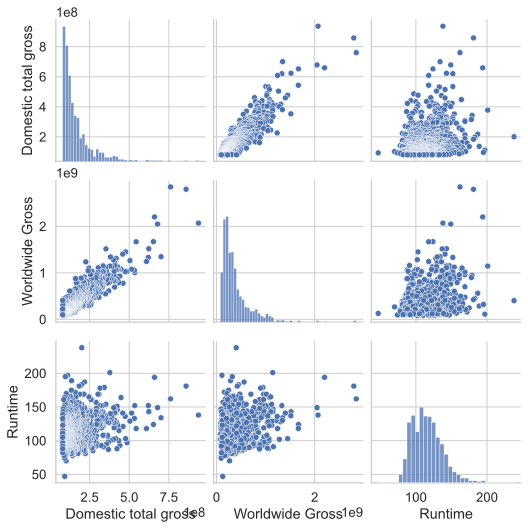

In [1033]:
sns.pairplot(testdf)

# Here, I'll get rid of the unknown domestic opening values

In [1040]:
testdf.drop(testdf[testdf['Domestic opening']== 'Unknown'].index,inplace=True)

In [1041]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      933 non-null    object 
 1   Domestic total gross  933 non-null    int64  
 2   Worldwide Gross       933 non-null    float64
 3   Budget                933 non-null    object 
 4   Runtime               933 non-null    float64
 5   Rating                933 non-null    object 
 6   Release date          933 non-null    object 
 7   Distributor           933 non-null    object 
 8   Genre                 933 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 72.9+ KB


# Here, I'll get rid of the unkown budget values

In [1046]:
testdf.drop(testdf[testdf['Budget']== 'Nof'].index,inplace=True)

In [1047]:
testdf = testdf.astype({"Budget": int})

In [1048]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, Star Wars: Episode VII - The Force Awakens to Jumper
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      901 non-null    int64  
 1   Domestic total gross  901 non-null    int64  
 2   Worldwide Gross       901 non-null    float64
 3   Budget                901 non-null    int64  
 4   Runtime               901 non-null    float64
 5   Rating                901 non-null    object 
 6   Release date          901 non-null    object 
 7   Distributor           901 non-null    object 
 8   Genre                 901 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# Now I'll plot again when the values are int64 or float64.

In [1073]:
sns.pairplot(testdf, plot_kws={'s': 8, 'alpha':0.2})

In [1058]:
testdf.describe()

Domestic opening  Domestic total gross  Worldwide Gross        Budget  \
count      9.010000e+02          9.010000e+02     9.010000e+02  9.010000e+02   
mean       4.234739e+07          1.653564e+08     3.912313e+08  8.793549e+07   
std        3.630116e+07          1.019995e+08     3.049224e+08  6.297494e+07   
min        1.446600e+04          8.017213e+07     8.064222e+07  1.500000e+04   
25%        2.233205e+07          1.010057e+08     1.986369e+08  3.800000e+07   
50%        3.361039e+07          1.301784e+08     2.985728e+08  7.500000e+07   
75%        5.217989e+07          1.880200e+08     4.680607e+08  1.300000e+08   
max        3.571150e+08          9.366622e+08     2.847246e+09  3.620000e+08   

          Runtime  
count  901.000000  
mean   115.956715  
std     20.762929  
min     47.000000  
25%    100.000000  
50%    115.000000  
75%    129.000000  
max    201.000000

In [1066]:
testdf.describe()

Domestic opening  Domestic total gross  Worldwide Gross       Budget  \
count            901.00                901.00           901.00       901.00   
mean        42347393.27          165356364.07     391231286.87  87935488.35   
std         36301164.28          101999520.04     304922371.91  62974943.64   
min            14466.00           80172128.00      80642217.00     15000.00   
25%         22332053.00          101005703.00     198636868.00  38000000.00   
50%         33610391.00          130178411.00     298572799.00  75000000.00   
75%         52179887.00          188020017.00     468060692.00 130000000.00   
max        357115007.00          936662225.00    2847246203.00 362000000.00   

       Runtime  
count   901.00  
mean    115.96  
std      20.76  
min      47.00  
25%     100.00  
50%     115.00  
75%     129.00  
max     201.00

In [1067]:
testdf.loc[testdf['Runtime']== 47.00]

Domestic opening  Domestic total gross  Worldwide Gross  \
Title                                                                       
Space Station 3D            489488              93383953     128363881.00   

                   Budget  Runtime                    Rating    Release date  \
Title                                                                          
Space Station 3D  1000000    47.00  Not found for this movie  April 19, 2002   

                 Distributor        Genre  
Title                                      
Space Station 3D        IMAX  Documentary

In [1074]:
corr = testdf.corr().copy(deep = True)

<AxesSubplot:>

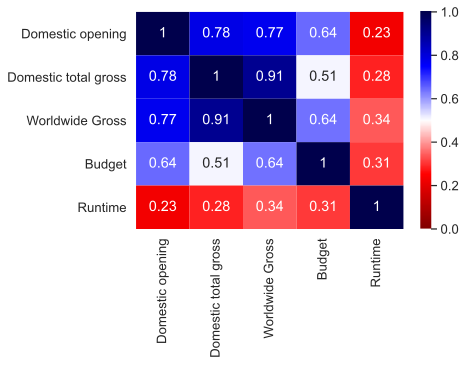

In [1076]:
sns.heatmap(corr, cmap="seismic_r", annot=True, vmin=0, vmax=1)

# We are seeing how the values that have most correlation with the worldwide gross are the Domestic Opening, the Domestic Total gross (although, we won't consider this feature for our application) and Budget!

In [1077]:
# Now, studying the Variance Inflation Factor

In [1078]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1079]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [1080]:
vif(testdf[['Domestic opening', 'Budget']])

Domestic opening    3.88
Budget             -2.91
dtype: float64

# Trying to get more movies to complete 1000. 

In [18]:
links = ['https://www.boxofficemojo.com/chart/never_in_top/?by_rank_threshold=1&offset=800']
mov_link=[]

In [20]:
for link in links[:]:
    response = requests.get(link)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    table = soup.find('table')
    rows = [row for row in table.find_all('tr')]
    for row in rows[1:201]:
        link_ = row.find_all('td')[1].find('a')['href']
        mov_link.append(link_)
    time.sleep(2)

mov_link

In [19]:
movie_data3 = []

In [21]:
for link in mov_link[:]:
    get_info(link)

In [22]:
len(movie_data3)

200

In [23]:
movie_data3[:3]

[{'Title': 'Firefox',
  'Domestic opening': 8152948,
  'Domestic total gross': 46708276,
  'Worldwide Gross': None,
  'Budget': None,
  'Runtime': 136,
  'Rating': None,
  'Release date': 'Jun 18, 1982',
  'Distributor': 'Warner Bros.',
  'Genre': 'Action            Adventure            Thriller'},
 {'Title': 'The Rocketeer',
  'Domestic opening': 9600754,
  'Domestic total gross': 46704056,
  'Worldwide Gross': None,
  'Budget': 35000000,
  'Runtime': 108,
  'Rating': None,
  'Release date': 'Jun 21, 1991',
  'Distributor': 'Walt Disney Studios Motion Pictures',
  'Genre': 'Action            Adventure            Family            Sci-Fi'},
 {'Title': 'Goosebumps 2: Haunted Halloween',
  'Domestic opening': 15802225,
  'Domestic total gross': 46700633,
  'Worldwide Gross': 93320380,
  'Budget': 35000000,
  'Runtime': 90,
  'Rating': 'PG',
  'Release date': 'Oct 12, 2018',
  'Distributor': 'Sony Pictures Entertainment (SPE)',
  'Genre': 'Adventure            Animation            Comedy 

In [13]:
newdf = pd.DataFrame(movie_data3)  #convert list of dict to df
newdf.set_index('Title', inplace=True)

In [24]:
new2 = pd.DataFrame(movie_data3)  #convert list of dict to df
new2.set_index('Title', inplace=True)

In [1124]:
newdf.head(10)

Domestic opening  \
Title                                                       
Sing                                             35258145   
My Big Fat Greek Wedding                           597362   
Alvin and the Chipmunks: The Squeakquel          48875415   
Alvin and the Chipmunks                          44307417   
A Star Is Born                                   42908051   
Sherlock Holmes                                  62304277   
Austin Powers: The Spy Who Shagged Me            17981900   
World War Z                                      66411834   
Ice Age: Dawn of the Dinosaurs                   41690382   
Interstellar                                     47510360   

                                         Domestic total gross  \
Title                                                           
Sing                                                270395425   
My Big Fat Greek Wedding                            241438208   
Alvin and the Chipmunks: The Squeakquel             219614612   
Alvin and the Chipmunks                             217326974   
A Star Is Born                                      215288866   
Sherlock Holmes                                     209028679   
Austin Powers: The Spy Who Shagged Me               206040086   
World War Z                                         202359711   
Ice Age: Dawn of the Dinosaurs                      196573705   
Interstellar                                        188020017   

                                         Worldwide Gross     Budget  Runtime  \
Title                                                                          
Sing                                        634151679.00   75000000   108.00   
My Big Fat Greek Wedding                    368744044.00    5000000    95.00   
Alvin and the Chipmunks: The Squeakquel     443140005.00   75000000    88.00   
Alvin and the Chipmunks                     365352546.00   60000000    92.00   
A Star Is Born                              436188866.00   36000000   136.00   
Sherlock Holmes                             524028679.00   90000000   128.00   
Austin Powers: The Spy Who Shagged Me       206756056.00   33000000    95.00   
World War Z                                 540007876.00  190000000   116.00   
Ice Age: Dawn of the Dinosaurs              886686817.00   90000000    94.00   
Interstellar                                677896797.00  165000000   169.00   

                                        Rating                Release date  \
Title                                                                        
Sing                                        PG                Dec 21, 2016   
My Big Fat Greek Wedding                    PG  Apr 19, 2002 (Aug 2, 2002)   
Alvin and the Chipmunks: The Squeakquel     PG                Dec 23, 2009   
Alvin and the Chipmunks                     PG                Dec 14, 2007   
A Star Is Born                               R                 Oct 5, 2018   
Sherlock Holmes                          PG-13                Dec 25, 2009   
Austin Powers: The Spy Who Shagged Me    PG-13                Jun 11, 1999   
World War Z                              PG-13                Jun 21, 2013   
Ice Age: Dawn of the Dinosaurs              PG                 Jul 1, 2009   
Interstellar                             PG-13   Nov 5, 2014 (Nov 7, 2014)   

                                                   Distributor  \
Title                                                            
Sing                                        Universal Pictures   
My Big Fat Greek Wedding                             IFC Films   
Alvin and the Chipmunks: The Squeakquel  Twentieth Century Fox   
Alvin and the Chipmunks                  Twentieth Century Fox   
A Star Is Born                                    Warner Bros.   
Sherlock Holmes                                   Warner Bros.   
Austin Powers: The Spy Who Shagged Me          New Line Cinema   
World War Z                        

In [25]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Firefox to Love, Simon
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      200 non-null    int64  
 1   Domestic total gross  200 non-null    int64  
 2   Worldwide Gross       145 non-null    float64
 3   Budget                118 non-null    float64
 4   Runtime               197 non-null    float64
 5   Rating                167 non-null    object 
 6   Release date          200 non-null    object 
 7   Distributor           200 non-null    object 
 8   Genre                 200 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 15.6+ KB


In [1122]:
newdf.loc[newdf['Domestic opening']== 35258145]

Domestic opening  Domestic total gross  Worldwide Gross    Budget  \
Title                                                                      
Sing           35258145             270395425     634151679.00  75000000   
Sing           35258145             270395425     634151679.00  75000000   

       Runtime Rating  Release date         Distributor  \
Title                                                     
Sing    108.00     PG  Dec 21, 2016  Universal Pictures   
Sing    108.00     PG  Dec 21, 2016  Universal Pictures   

                                                   Genre  
Title                                                     
Sing   Animation            Comedy            Family ...  
Sing   Animation            Comedy            Family ...

In [1126]:
newdf.drop(newdf[newdf['Budget']== 'Nof'].index,inplace=True)

In [1128]:
newdf.drop(newdf[newdf['Budget']== 'NaN'].index,inplace=True)

In [1129]:
newdf = newdf.astype({"Budget": int})

In [1130]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Sing to Sing
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      173 non-null    int64  
 1   Domestic total gross  173 non-null    int64  
 2   Worldwide Gross       162 non-null    float64
 3   Budget                173 non-null    int64  
 4   Runtime               168 non-null    float64
 5   Rating                173 non-null    object 
 6   Release date          173 non-null    object 
 7   Distributor           173 non-null    object 
 8   Genre                 173 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 13.5+ KB


In [26]:
new2.dropna(axis=0, how= 'any', inplace=True)

In [27]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, Goosebumps 2: Haunted Halloween to Love, Simon
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      106 non-null    int64  
 1   Domestic total gross  106 non-null    int64  
 2   Worldwide Gross       106 non-null    float64
 3   Budget                106 non-null    float64
 4   Runtime               106 non-null    float64
 5   Rating                106 non-null    object 
 6   Release date          106 non-null    object 
 7   Distributor           106 non-null    object 
 8   Genre                 106 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 8.3+ KB


In [1133]:
newdf.describe()

Domestic opening  Domestic total gross  Worldwide Gross       Budget  \
count            157.00                157.00           157.00       157.00   
mean        27148748.06          127635408.60     287876864.69  74458980.89   
std         13896728.67           35305420.12     137747259.91  46233420.41   
min           162146.00           90411453.00     101888019.00     60000.00   
25%         20553320.00          101802906.00     191466556.00  40000000.00   
50%         27281735.00          115253424.00     246233113.00  65000000.00   
75%         35260212.00          143495265.00     353641895.00 100000000.00   
max         68743584.00          270395425.00     886686817.00 200000000.00   

       Runtime  
count   157.00  
mean    114.98  
std      20.78  
min      78.00  
25%     100.00  
50%     113.00  
75%     128.00  
max     189.00

In [1135]:
newdf.loc[newdf['Budget']== 60000.00]

Domestic opening  Domestic total gross  \
Title                                                             
The Blair Witch Project           1512054             140539099   

                         Worldwide Gross  Budget  Runtime Rating  \
Title                                                              
The Blair Witch Project     248639099.00   60000    81.00      R   

                                        Release date            Distributor  \
Title                                                                         
The Blair Witch Project  Jul 16, 1999 (Jul 30, 1999)  Artisan Entertainment   

                                             Genre  
Title                                               
The Blair Witch Project  Horror            Mystery

In [1137]:
newdf.Distributor.unique()

array(['Universal Pictures', 'IFC Films', 'Twentieth Century Fox',
       'Warner Bros.', 'New Line Cinema', 'Paramount Pictures',
       'Walt Disney Studios Motion Pictures', 'Miramax',
       'Sony Pictures Entertainment (SPE)', 'Lionsgate', 'DreamWorks',
       'DreamWorks Distribution', 'The Weinstein Company',
       'Fox Searchlight Pictures', 'Artisan Entertainment',
       'Metro-Goldwyn-Mayer (MGM)', 'STX Entertainment',
       'TriStar Pictures', 'Revolution Studios',
       'United Artists Releasing', 'FilmDistrict'], dtype=object)

In [28]:
#Alright, now, I'm gonna complete 1000 rows
finaldf = pd.concat([newdf, new2])

In [29]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, The Shallows to Love, Simon
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      213 non-null    float64
 1   Domestic total gross  213 non-null    int64  
 2   Worldwide Gross       213 non-null    float64
 3   Budget                213 non-null    float64
 4   Runtime               213 non-null    float64
 5   Rating                213 non-null    object 
 6   Release date          213 non-null    object 
 7   Distributor           213 non-null    object 
 8   Genre                 213 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 16.6+ KB


In [31]:
df = pd.read_csv('final_data.csv', index_col=0)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, Star Wars: Episode VII - The Force Awakens to The Bounty Hunter
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      1090 non-null   int64  
 1   Domestic total gross  1090 non-null   int64  
 2   Worldwide Gross       1090 non-null   float64
 3   Budget                1090 non-null   float64
 4   Runtime               1090 non-null   float64
 5   Rating                1090 non-null   object 
 6   Release date          1090 non-null   object 
 7   Distributor           1090 non-null   object 
 8   Genre                 1090 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 85.2+ KB


In [34]:
df = pd.concat([df,finaldf])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, Star Wars: Episode VII - The Force Awakens to Love, Simon
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      1303 non-null   float64
 1   Domestic total gross  1303 non-null   int64  
 2   Worldwide Gross       1303 non-null   float64
 3   Budget                1303 non-null   float64
 4   Runtime               1303 non-null   float64
 5   Rating                1303 non-null   object 
 6   Release date          1303 non-null   object 
 7   Distributor           1303 non-null   object 
 8   Genre                 1303 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 101.8+ KB


In [36]:
df = df[~df.index.duplicated(keep='first')]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, Star Wars: Episode VII - The Force Awakens to Love, Simon
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      1060 non-null   float64
 1   Domestic total gross  1060 non-null   int64  
 2   Worldwide Gross       1060 non-null   float64
 3   Budget                1060 non-null   float64
 4   Runtime               1060 non-null   float64
 5   Rating                1060 non-null   object 
 6   Release date          1060 non-null   object 
 7   Distributor           1060 non-null   object 
 8   Genre                 1060 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 82.8+ KB


In [38]:
df.describe()

Domestic opening  Domestic total gross  Worldwide Gross       Budget  \
count           1060.00               1060.00          1060.00      1060.00   
mean        37813458.29          140689024.14     334307541.14  81814599.06   
std         34406034.95          102334506.96     298282233.33  60685352.12   
min            14466.00           40826341.00      42580920.00     15000.00   
25%         17459135.00           81239022.75     154573605.75  35000000.00   
50%         29125360.50          110492896.00     238898955.00  66000000.00   
75%         46537205.50          167838594.75     400611351.25 115000000.00   
max        357115007.00          936662225.00    2847246203.00 362000000.00   

       Runtime  
count  1060.00  
mean    114.86  
std      20.00  
min      78.00  
25%      99.00  
50%     113.00  
75%     127.25  
max     201.00

In [39]:
df['Rating'].unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [40]:
df.loc[df['Domestic opening']== 14466.00]

Domestic opening  Domestic total gross  Worldwide Gross  \
Title                                                                         
Mr. Holland's Opus          14466.00              82569971     106269971.00   

                        Budget  Runtime Rating       Release date  \
Title                                                               
Mr. Holland's Opus 31000000.00   143.00     PG  December 29, 1995   

                                            Distributor  \
Title                                                     
Mr. Holland's Opus  Walt Disney Studios Motion Pictures   

                                     Genre  
Title                                       
Mr. Holland's Opus  Drama            Music

# As we see that there are 87 rows withouth Rating, I'll just drop those rows. 

In [1160]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, Star Wars: Episode VII - The Force Awakens to Sing
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      1058 non-null   int64  
 1   Domestic total gross  1058 non-null   int64  
 2   Worldwide Gross       1058 non-null   float64
 3   Budget                1058 non-null   int64  
 4   Runtime               1058 non-null   float64
 5   Rating                1058 non-null   object 
 6   Release date          1058 non-null   object 
 7   Distributor           1058 non-null   object 
 8   Genre                 1058 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 82.7+ KB


In [1161]:
finaldf.drop(finaldf[finaldf['Rating']== 'Not found for this movie'].index , inplace=True)

In [1162]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, Star Wars: Episode VII - The Force Awakens to Sing
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      964 non-null    int64  
 1   Domestic total gross  964 non-null    int64  
 2   Worldwide Gross       964 non-null    float64
 3   Budget                964 non-null    int64  
 4   Runtime               964 non-null    float64
 5   Rating                964 non-null    object 
 6   Release date          964 non-null    object 
 7   Distributor           964 non-null    object 
 8   Genre                 964 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 75.3+ KB


# Trying to get more movies to complete 1000. 

In [3]:
links = ['https://www.boxofficemojo.com/chart/never_in_top/?by_rank_threshold=1&offset=600']
mov_link=[]

In [4]:
for link in links[:]:
    response = requests.get(link)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    table = soup.find('table')
    rows = [row for row in table.find_all('tr')]
    for row in rows[1:201]:
        link_ = row.find_all('td')[1].find('a')['href']
        mov_link.append(link_)
    time.sleep(2)

In [7]:
mov_link

['/release/rl3145565697/?ref_=bo_cso_table_1',
 '/release/rl3428353537/?ref_=bo_cso_table_2',
 '/release/rl1029080577/?ref_=bo_cso_table_3',
 '/release/rl2287437313/?ref_=bo_cso_table_4',
 '/release/rl3614475777/?ref_=bo_cso_table_5',
 '/release/rl3657664001/?ref_=bo_cso_table_6',
 '/release/rl3494872577/?ref_=bo_cso_table_7',
 '/release/rl4135224833/?ref_=bo_cso_table_8',
 '/release/rl4286547457/?ref_=bo_cso_table_9',
 '/release/rl1249150465/?ref_=bo_cso_table_10',
 '/release/rl1013614081/?ref_=bo_cso_table_11',
 '/release/rl654542337/?ref_=bo_cso_table_12',
 '/release/rl0361985/?ref_=bo_cso_table_13',
 '/release/rl4033906177/?ref_=bo_cso_table_14',
 '/release/rl695240193/?ref_=bo_cso_table_15',
 '/release/rl4265772545/?ref_=bo_cso_table_16',
 '/release/rl3221390849/?ref_=bo_cso_table_17',
 '/release/rl1348896257/?ref_=bo_cso_table_18',
 '/release/rl1817019905/?ref_=bo_cso_table_19',
 '/release/rl4278224385/?ref_=bo_cso_table_20',
 '/release/rl559449601/?ref_=bo_cso_table_21',
 '/rele

mov_link

In [5]:
movie_data3 = []

In [8]:
for link in mov_link[:100]:
    get_info(link)

In [1152]:
len(movie_data3)

200

In [1153]:
movie_data3[10]

{'Title': 'Percy Jackson & the Olympians: The Lightning Thief',
 'Domestic opening': 31236067,
 'Domestic total gross': 88768303,
 'Worldwide Gross': 226497209,
 'Budget': 95000000,
 'Runtime': 118,
 'Rating': 'PG',
 'Release date': 'Feb 12, 2010',
 'Distributor': 'Twentieth Century Fox',
 'Genre': 'Adventure            Family            Fantasy'}

In [1154]:
newdf1 = pd.DataFrame(movie_data3[:201])  #convert list of dict to df
newdf1.set_index('Title', inplace=True)

In [1155]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Trading Places to 102 Dalmatians
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      200 non-null    int64  
 1   Domestic total gross  200 non-null    int64  
 2   Worldwide Gross       165 non-null    float64
 3   Budget                147 non-null    float64
 4   Runtime               197 non-null    float64
 5   Rating                172 non-null    object 
 6   Release date          200 non-null    object 
 7   Distributor           200 non-null    object 
 8   Genre                 200 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 15.6+ KB


In [1156]:
newdf1['Rating'].unique()

array([None, 'PG-13', 'PG', 'R', 'G'], dtype=object)

In [1157]:
newdf1.Distributor.unique()

array(['Paramount Pictures', 'Summit Entertainment',
       'Walt Disney Studios Motion Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Warner Bros.', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'MacGillivray Freeman Films',
       'Universal Pictures', 'Dimension Films', 'Lionsgate',
       'Columbia Pictures', 'DreamWorks Distribution', 'TriStar Pictures',
       'Roadside Attractions', 'United Artists', 'Focus Features',
       'Fox Searchlight Pictures', 'New Line Cinema', 'Miramax',
       'Warner Independent Pictures (WIP)', 'Revolution Studios',
       'Overture Films', 'DreamWorks', 'STX Entertainment',
       'MGM/Weinstein', 'Relativity Media'], dtype=object)

In [1158]:
newdf1.dropna(axis=0, how= 'any', inplace=True)
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, RED to The Bounty Hunter
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      133 non-null    int64  
 1   Domestic total gross  133 non-null    int64  
 2   Worldwide Gross       133 non-null    float64
 3   Budget                133 non-null    float64
 4   Runtime               133 non-null    float64
 5   Rating                133 non-null    object 
 6   Release date          133 non-null    object 
 7   Distributor           133 non-null    object 
 8   Genre                 133 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 10.4+ KB


In [1159]:
newdf1['Rating'].unique()

array(['PG-13', 'PG', 'R', 'G'], dtype=object)

In [1163]:
newdf1.describe()

Domestic opening  Domestic total gross  Worldwide Gross       Budget  \
count            133.00                133.00           133.00       133.00   
mean        19497904.50           76715151.20     168929222.68  60544360.90   
std          7961847.07            6569699.69      70575312.90  42992057.78   
min           157624.00           67061228.00      71406573.00   4900000.00   
25%         15861939.00           71308997.00     118587880.00  29000000.00   
50%         20139985.00           75628110.00     149673788.00  50000000.00   
75%         23851539.00           81903458.00     204594016.00  79000000.00   
max         40300288.00           90380162.00     440603537.00 250000000.00   

       Runtime  
count   133.00  
mean    110.11  
std      16.03  
min      80.00  
25%      99.00  
50%     108.00  
75%     121.00  
max     167.00

In [1164]:
newdf1.loc[newdf1['Domestic opening']== 40300288.00]

Domestic opening  Domestic total gross  Worldwide Gross  \
Title                                                                    
Power Rangers          40300288              85364450     142337240.00   

                    Budget  Runtime Rating  Release date Distributor  \
Title                                                                  
Power Rangers 100000000.00   124.00  PG-13  Mar 24, 2017   Lionsgate   

                                                       Genre  
Title                                                         
Power Rangers  Action            Adventure            Sci-Fi

In [1166]:
#Alright, data is looking good, now I'll proceed to create the final final df. 

In [1167]:
final = pd.concat([finaldf, newdf1])

In [1168]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, Star Wars: Episode VII - The Force Awakens to The Bounty Hunter
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      1097 non-null   int64  
 1   Domestic total gross  1097 non-null   int64  
 2   Worldwide Gross       1097 non-null   float64
 3   Budget                1097 non-null   float64
 4   Runtime               1097 non-null   float64
 5   Rating                1097 non-null   object 
 6   Release date          1097 non-null   object 
 7   Distributor           1097 non-null   object 
 8   Genre                 1097 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 85.7+ KB


In [1169]:
final.describe()

Domestic opening  Domestic total gross  Worldwide Gross       Budget  \
count           1097.00               1097.00          1097.00      1097.00   
mean        39172778.99          150568264.87     357585813.17  86007233.36   
std         33314099.45           95545194.96     285454051.19  59709526.12   
min            14466.00           67061228.00      71406573.00     15000.00   
25%         21514095.00           93354851.00     179769457.00  40000000.00   
50%         30833665.00          118594548.00     268426634.00  75000000.00   
75%         46607250.00          170742341.00     418765519.00 123000000.00   
max        357115007.00          936662225.00    2847246203.00 362000000.00   

       Runtime  
count  1097.00  
mean    115.66  
std      20.27  
min      78.00  
25%     100.00  
50%     114.00  
75%     128.00  
max     201.00

In [1172]:
final.sample(20)

Domestic opening  \
Title                                                        
Hotel Transylvania                                42522194   
Shazam!                                           53505326   
The Flintstones                                   29688730   
Hidden Figures                                      515499   
Sausage Party                                     34263534   
Bad Moms                                          23817340   
The Day After Tomorrow                            68743584   
The Score                                         19018807   
Rango                                             38079323   
Julie & Julia                                     20027956   
Pulp Fiction                                       9311882   
Ted 2                                             33507870   
Cars 3                                            53688680   
A Beautiful Mind                                    367151   
Deadpool                                         132434639   
RED                                               21761408   
Hotel Transylvania 2                              48464322   
The Dark Knight Rises                            160887295   
Creed                                             29632823   
Captain Underpants: The First Epic Movie          23851539   

                                          Domestic total gross  \
Title                                                            
Hotel Transylvania                                   148313048   
Shazam!                                              140371656   
The Flintstones                                      130531208   
Hidden Figures                                       169607287   
Sausage Party                                         97685686   
Bad Moms                                             113257297   
The Day After Tomorrow                               186740799   
The Score                                             71107711   
Rango                                                123477607   
Julie & Julia                                         94125426   
Pulp Fiction                                         107928762   
Ted 2                                                 81476385   
Cars 3                                               152901115   
A Beautiful Mind                                     170742341   
Deadpool                                             363070709   
RED                                                   90380162   
Hotel Transylvania 2                                 169700110   
The Dark Knight Rises                                448139099   
Creed                                                109767581   
Captain Underpants: The First Epic Movie              73921000   

                                          Worldwide Gross       Budget  \
Title                                                                    
Hotel Transylvania                           358375603.00  85000000.00   
Shazam!                                      365971656.00 100000000.00   
The Flintstones                              341631208.00  46000000.00   
Hidden Figures                               236225193.00  25000000.00   
Sausage Party                                140705322.00  19000000.00   
Bad Moms                                     183936074.00  20000000.00   
The Day After Tomorrow                       552639571.00 125000000.00   
The Score                                    114252154.00  68000000.00   
Rango                                        245724603.00 135000000.00   
Julie & Julia                                129540522.00  40000000.00   
Pulp Fiction                                 213928762.00   8000000.00   
Ted 2                                        215863606.00  68000000.00   
Cars 3                                       383930656.00 175000000.00   
A Beautiful Mind                             316791257.00  58000000.00   
Deadpool                                

In [1171]:
#gonna save this dataframe in my disk to be able to restart my computer that is having a hard time keeping up

In [41]:
df.to_csv('final_data.csv', index=True)

In [1192]:
pd.read_csv('final_data.csv', index_col=0).head()

Domestic opening  \
Title                                                          
Star Wars: Episode VII - The Force Awakens         247966675   
Avengers: Endgame                                  357115007   
Avatar                                              77025481   
Avengers: Infinity War                             257698183   
Titanic                                             28638131   

                                            Domestic total gross  \
Title                                                              
Star Wars: Episode VII - The Force Awakens             936662225   
Avengers: Endgame                                      858373000   
Avatar                                                 760507625   
Avengers: Infinity War                                 678815482   
Titanic                                                659363944   

                                            Worldwide Gross       Budget  \
Title                                                                      
Star Wars: Episode VII - The Force Awakens    2069521700.00 245000000.00   
Avengers: Endgame                             2797501328.00 356000000.00   
Avatar                                        2847246203.00 237000000.00   
Avengers: Infinity War                        2048359754.00 362000000.00   
Titanic                                       2201647264.00 200000000.00   

                                            Runtime Rating       Release date  \
Title                                                                           
Star Wars: Episode VII - The Force Awakens   138.00  PG-13  December 16, 2015   
Avengers: Endgame                            181.00  PG-13     April 24, 2019   
Avatar                                       162.00  PG-13  December 16, 2009   
Avengers: Infinity War                       149.00  PG-13     April 25, 2018   
Titanic                                      194.00  PG-13  December 19, 1997   

                                                                    Distributor  \
Title                                                                             
Star Wars: Episode VII - The Force Awakens  Walt Disney Studios Motion Pictures   
Avengers: Endgame                           Walt Disney Studios Motion Pictures   
Avatar                                                    Twentieth Century Fox   
Avengers: Infinity War                      Walt Disney Studios Motion Pictures   
Titanic                                                      Paramount Pictures   

                                                                                        Genre  
Title                                                                                          
Star Wars: Episode VII - The Force Awakens      Action            Adventure            Sci-Fi  
Avengers: Endgame                           Action            Adventure            Drama  ...  
Avatar                                      Action            Adventure            Fantasy...  
Avengers: Infinity War                          Action            Adventure            Sci-Fi  
Titanic                                                              Drama            Romance

In [1180]:
sns.pairplot(final)

In [1186]:
final.loc[final.duplicated()]

Domestic opening  Domestic total gross  \
Title                                                           
Kung Fu Panda 2                47656302             165249063   
The Longest Yard               47606480             158119460   
The Hangover Part III          41671198             112200072   
The Italian Job                19457944             106128601   
Daddy Day Care                 27623580             104297061   
Sex and the City 2             31001870              95347692   
Sing                           35258145             270395425   

                       Worldwide Gross       Budget  Runtime Rating  \
Title                                                                 
Kung Fu Panda 2           665692281.00 150000000.00    90.00     PG   
The Longest Yard          191466556.00  82000000.00   113.00  PG-13   
The Hangover Part III     362000072.00 103000000.00   100.00      R   
The Italian Job           176070171.00  60000000.00   111.00  PG-13   
Daddy Day Care            164433867.00  60000000.00    92.00     PG   
Sex and the City 2        290745055.00 100000000.00   146.00      R   
Sing                      634151679.00  75000000.00   108.00     PG   

                       Release date         Distributor  \
Title                                                     
Kung Fu Panda 2        May 26, 2011          DreamWorks   
The Longest Yard       May 27, 2005  Paramount Pictures   
The Hangover Part III  May 23, 2013        Warner Bros.   
The Italian Job        May 30, 2003  Paramount Pictures   
Daddy Day Care          May 9, 2003  Revolution Studios   
Sex and the City 2     May 27, 2010        Warner Bros.   
Sing                   Dec 21, 2016  Universal Pictures   

                                                                   Genre  
Title                                                                     
Kung Fu Panda 2        Action            Adventure            Animati...  
The Longest Yard                Comedy            Crime            Sport  
The Hangover Part III                            Comedy            Crime  
The Italian Job              Action            Crime            Thriller  
Daddy Day Care                                  Comedy            Family  
Sex and the City 2            Comedy            Drama            Romance  
Sing                   Animation            Comedy            Family ...

In [1189]:
final.drop_duplicates(keep='first', inplace=True)

In [1190]:
final.loc[final.duplicated()]

Empty DataFrame
Columns: [Domestic opening, Domestic total gross, Worldwide Gross, Budget, Runtime, Rating, Release date, Distributor, Genre]
Index: []

In [2]:
#Reading the CSV value

In [7]:
final = pd.read_csv('final_data.csv', index_col=0)

In [23]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, Star Wars: Episode VII - The Force Awakens to The Bounty Hunter
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic opening      1090 non-null   int64  
 1   Domestic total gross  1090 non-null   int64  
 2   Worldwide Gross       1090 non-null   float64
 3   Budget                1090 non-null   float64
 4   Runtime               1090 non-null   float64
 5   Rating                1090 non-null   object 
 6   Release date          1090 non-null   object 
 7   Distributor           1090 non-null   object 
 8   Genre                 1090 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 117.4+ KB


In [8]:
final.sample(10)

Domestic opening  Domestic total gross  \
Title                                                                 
The Twilight Saga: New Moon         142839137             297816253   
Brokeback Mountain                     547425              83043761   
Paranormal Activity 3                52568183             104028807   
Alita: Battle Angel                  28525613              85838210   
Disclosure                           10068126              83015089   
Scooby-Doo                           54155312             153294164   
The Patriot                          22413710             113330342   
Little Fockers                       30833665             148438600   
The Smurfs                           35611637             142614158   
Catch Me If You Can                  30053627             164615351   

                             Worldwide Gross       Budget  Runtime Rating  \
Title                                                                       
The Twilight Saga: New Moon     711025481.00  50000000.00   130.00  PG-13   
Brokeback Mountain              178062759.00  14000000.00   134.00      R   
Paranormal Activity 3           207039844.00   5000000.00    83.00      R   
Alita: Battle Angel             404980543.00 170000000.00   122.00  PG-13   
Disclosure                      214015089.00  55000000.00   128.00      R   
Scooby-Doo                      275650703.00  84000000.00    89.00     PG   
The Patriot                     215294342.00 110000000.00   165.00      R   
Little Fockers                  310650585.00 100000000.00    98.00  PG-13   
The Smurfs                      563749323.00 110000000.00   103.00     PG   
Catch Me If You Can             352114312.00  52000000.00   141.00  PG-13   

                                  Release date  \
Title                                            
The Twilight Saga: New Moon  November 18, 2009   
Brokeback Mountain            December 9, 2005   
Paranormal Activity 3         October 19, 2011   
Alita: Battle Angel           February 5, 2019   
Disclosure                    December 9, 1994   
Scooby-Doo                       June 14, 2002   
The Patriot                       Jun 28, 2000   
Little Fockers               December 22, 2010   
The Smurfs                       July 27, 2011   
Catch Me If You Can               Dec 25, 2002   

                                                   Distributor  \
Title                                                            
The Twilight Saga: New Moon               Summit Entertainment   
Brokeback Mountain                              Focus Features   
Paranormal Activity 3                       Paramount Pictures   
Alita: Battle Angel                      Twentieth Century Fox   
Disclosure                                        Warner Bros.   
Scooby-Doo                                        Warner Bros.   
The Patriot                  Sony Pictures Entertainment (SPE)   
Little Fockers                              Universal Pictures   
The Smurfs                   Sony Pictures Entertainment (SPE)   
Catch Me If You Can                    DreamWorks Distribution   

                                                                         Genre  
Title                                                                           
The Twilight Saga: New Moon  Adventure            Drama            Fantasy ...  
Brokeback Mountain                                    Drama            Romance  
Paranormal Activity 3                                Horror            Mystery  
Alita: Battle Angel          Action            Adventure            Sci-Fi ...  
Disclosure                                           Drama            Thriller  
Scooby-Doo                   Adventure            Comedy            Family ...  
The Patriot                  Action            Drama            History    ...  
Little Fockers                                       Comedy            Romance  
The Smurfs                   Adventure         

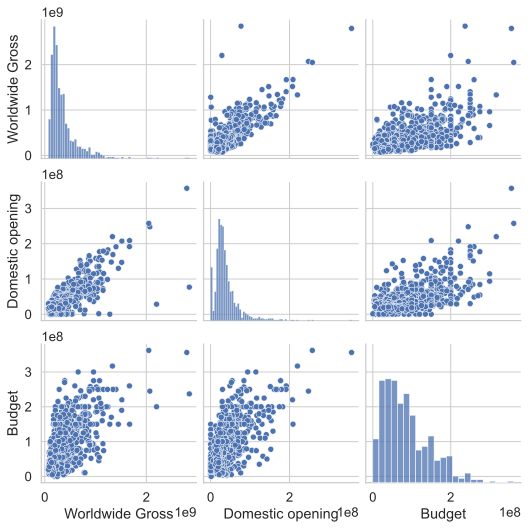

In [32]:
sns.pairplot(final[['Worldwide Gross', 'Domestic opening', 'Budget']])

In [10]:
corr3 = final.corr().copy(deep=True)

In [56]:
upper = np.triu(corr3)

<AxesSubplot:>

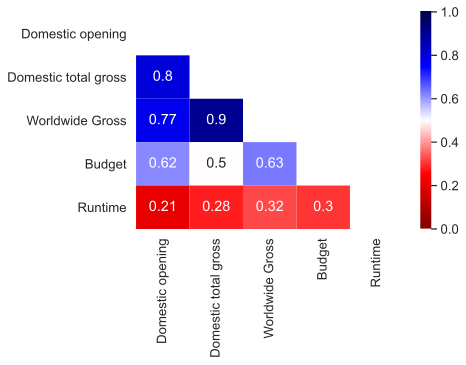

In [57]:
sns.heatmap(corr3, cmap="seismic_r", annot=True, vmin=0, vmax=1, mask=upper)

In [12]:
#Alright, now we are going to do the split of the data. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [14]:
#I will create a simple train/validation/test model with the two features that have a higher correlation
#with the target. 

In [22]:
X, y = final[['Domestic opening', 'Budget']], final['Worldwide Gross']
X.shape

(1090, 2)

In [17]:
#Separating the data into 80 and 20%

In [24]:
X, X_hold_out, y, y_hold_out = train_test_split(X, y, test_size=.2, random_state=10)

In [25]:
#Further separating the X and y data into training and validation (60 and 20%)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [21]:
#We will train a simple validation model. 

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train, y_train)
print(f'Linear Regression R^2: {lm.score(X_val, y_val):.4f}')

Linear Regression R^2: 0.4880


In [39]:
#We can obtain the intercept and coefficients for this model 

In [40]:
print(lm.intercept_)
print(lm.coef_)

52870064.83147538
[5.50531072 1.00798525]


In [41]:
#So, the equation in this case will be:

worldwide_gross = 52870064 + 5.505*(Domestic Opening) + 1.007*(Budget)

In [42]:
X_train['Domestic opening'].shape

(654,)

In [36]:
y_train.shape

(654,)